In [3]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
import os
os.listdir('../Landsat8/')

['LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif',
 'LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif']

In [6]:
imagePath = '../Landsat8/'
band4 = rasterio.open(imagePath+'LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.TIF')
band5 = rasterio.open(imagePath+'LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.TIF')

In [7]:
band4.count

1

In [8]:
band4.height

1338

In [9]:
band4.width

2107

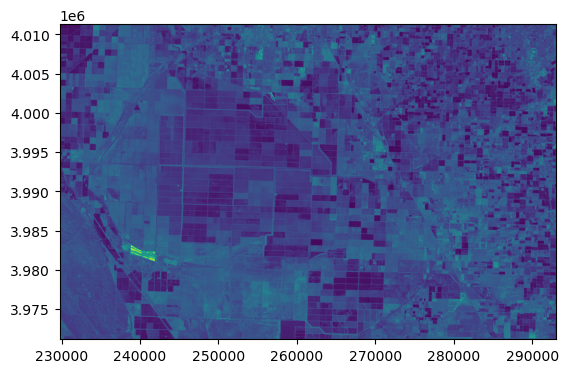

<Axes: >

In [10]:
plot.show(band4)

In [8]:
band4.dtypes[0]

'uint16'

In [9]:
band4.crs

CRS({'init': 'epsg:32611'})

In [10]:
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [11]:
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

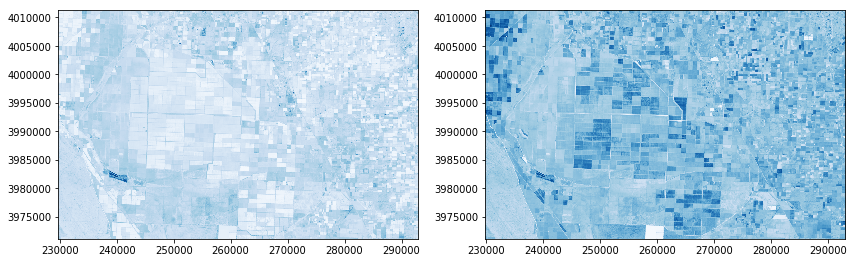

In [12]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [14]:
nir = band5.read(1).astype('float64')
red = band4.read(1).astype('float64')

nir[100:105,100:105]

array([[30520., 30770., 30535., 29986., 30101.],
       [30483., 30935., 30510., 30105., 30115.],
       [30084., 30399., 31057., 30611., 30064.],
       [23879., 24098., 23257., 23271., 24474.],
       [17885., 17740., 18525., 18718., 17927.]])

In [16]:
ndvi = np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)
)

In [17]:
ndviImage = rasterio.open('../Output/ndviImage.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                          count=1,
                          crs=band4.crs,
                          transform=band4.transform,
                          dtype='float64'
                         )
ndviImage.write(ndvi,1)
ndviImage.close()

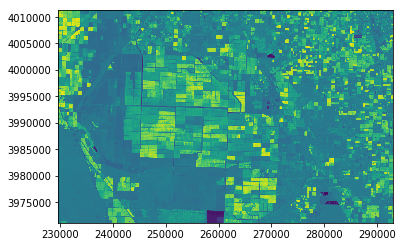

In [25]:
ndvi = rasterio.open('../Output/ndviImage.tiff')
plot.show(ndvi)